# Linear Regression

 Predict the Influence of the Crimerate (First Column in the dataframe) on the Housing Price! <br>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
#load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# check the Dataset

In [3]:
#check the Dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# the number of rows and columns
df.shape

(506, 13)

In [5]:
# check if we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# RM - average number of rooms per dwelling

In [13]:
# choose the RM column to be our explanatory that we want to use to predict out Target `the prices`
housing_x = pd.DataFrame(boston.data[:,np.newaxis,5])
housing_x.head()

,0
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [14]:
housing_y = pd.DataFrame(boston.target[:])
housing_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
# check the shape
housing_x.shape ,  housing_y.shape

((506, 1), (506, 1))

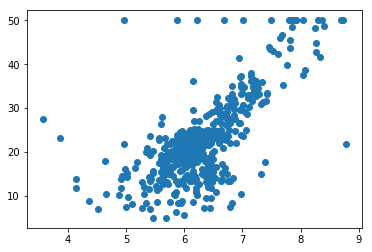

In [18]:
# check the relationship between our explanatory'RM' and response'target'
plt.scatter(housing_x,housing_y);

# splitting

In [19]:
# splitting the x data to train and test
housing_x_train = housing_x.sample(frac = 0.5,random_state = 42)
housing_x_test = housing_x.loc[~housing_x.index.isin(housing_x_train.index),:]
housing_x_train.shape ,  housing_x_test.shape

((253, 1), (253, 1))

In [21]:
# splitting the y data "the Target" to train and test
housing_y_train = housing_y.sample(frac = 0.5,random_state = 42)
housing_y_test = housing_y.loc[~housing_y.index.isin(housing_y_train.index),:]
housing_y_train.shape , housing_y_test.shape

((253, 1), (253, 1))

# modeling

In [26]:
# fit the linear regressor model with the default labels to our train Data and check our intercept and coeffecient
linreg = LinearRegression()
linreg.fit(housing_x_train,housing_y_train)
print(linreg.intercept_)
print(linreg.coef_)

[-31.63159615]
[[8.63775085]]


In [46]:
# predicting the prices
housing_y_predict = linreg.predict(housing_x_test)

In [29]:
housing_y_test.shape , housing_y_predict.shape

((253, 1), (253, 1))

# Measures our prediction

In [36]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(housing_y_test,housing_y_predict)))
print('variance score:%.2f'%r2_score(housing_y_test,housing_y_predict))

6.531912783105431
variance score:0.51


# visualisation

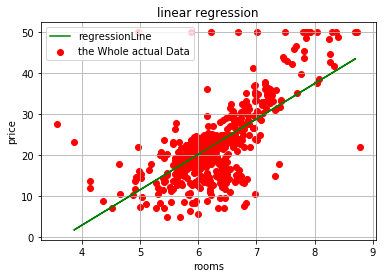

In [53]:
plt.scatter(housing_x,housing_y,color = 'red',label = "the Whole actual Data")
plt.plot(housing_x_test,housing_y_predict,label = "regressionLine",color = 'green')
plt.xlabel('rooms')
plt.ylabel('price')
plt.title("linear regression")
plt.grid()
plt.legend()
plt.show()

In [49]:
all_housing_y_predict = linreg.predict(housing_x)

## Comparing the predicted prices with the actual one

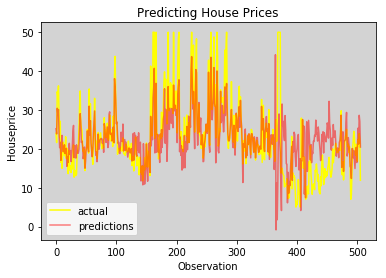

In [52]:
%matplotlib inline
plt.plot(housing_y,label = 'actual',color = 'yellow');
plt.plot(all_housing_y_predict,label = 'predictions',color = 'red',alpha =0.5);
ax = plt.gca()
ax.set_facecolor("lightgrey")
plt.legend()
plt.title("Predicting House Prices")
plt.xlabel("Observation")
plt.ylabel("Houseprice")
plt.savefig("Housing.png")